In [44]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as Layers
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

import os
import cv2
import numpy as np
import seaborn as sn; sn.set(font_scale=1.4)
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import pandas as pd
from keras.applications.inception_v3 import InceptionV3
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten,Conv2D,Dropout
from keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from sklearn.utils import shuffle  
import seaborn as sns
import cv2
from sklearn.metrics import plot_confusion_matrix,classification_report,confusion_matrix
import pandas as pd
from tqdm import tqdm
import os

In [46]:
!apt-get install -y libsm6 libxext6 libxrender-dev
!pip install opencv-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libsm6 is already the newest version (2:1.2.2-1).
libxext6 is already the newest version (2:1.3.3-1).
libxrender-dev is already the newest version (1:0.9.10-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [47]:
!pip install tensorflow==2.6.0
!pip install keras~=2.6.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
class_names = ['bag', 'bed', 'chair', 'coffeetable', 'cup', 'kitchentools', 'lamp', 'laptop', 'LivingSofa', 'pot', 'shoe']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
mapclass = {0 : 'bag', 1 : 'bed', 2 : 'chair', 3 : 'coffeetable', 4 : 'cup' , 5 : 'kitchentools', 6 : 'lamp', 7 : 'laptop', 8 : 'LivingSofa', 9 : 'pot', 10 : 'shoe'}
from pathlib import Path
import glob

train_path = Path("/content/drive/MyDrive/colab/termproject/Term_Dataset/train")
train_path.glob(r'**/*.png')
valid_path = Path("/content/drive/MyDrive/colab/termproject/Term_Dataset/val")
valid_path.glob(r'**/*.png')

<generator object Path.glob at 0x7fada007add0>

In [50]:
train_filepath = list(train_path.glob(r'**/*.png'))
valid_filepath = list(valid_path.glob(r'**/*.png'))
print(train_filepath)

[PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00071.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00024.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00013.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00066.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00068.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00033.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00087.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00122.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00042.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00051.png'), PosixPath('/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00054.png'), PosixPath('/content/drive/MyDrive/colab/te

In [51]:
for i in train_filepath:  
  num = str(i.stem)
  print(i)
  print(num)
  print(int(num[3:8]))

/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00071.png
img00071
71
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00024.png
img00024
24
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00013.png
img00013
13
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00066.png
img00066
66
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00068.png
img00068
68
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00033.png
img00033
33
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00087.png
img00087
87
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00122.png
img00122
122
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00042.png
img00042
42
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00051.png
img00051
51
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00054.png
img00054
54
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img0

In [52]:
os.path.split(train_filepath[0])[1]

'img00071.png'

In [53]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],valid_filepath)))

133

In [54]:
len(list(map(lambda x: os.path.split(os.path.split(x)[0])[1],train_filepath)))

864

In [55]:
classes_train = []
classes_valid = []

In [56]:
csv_file = pd.read_csv('/content/drive/MyDrive/colab/termproject/Term_Dataset/train_data.csv')

for i in train_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_train.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break

In [57]:
csv_file = pd.read_csv('/content/drive/MyDrive/colab/termproject/Term_Dataset/val_data.csv')

for i in valid_filepath:  
  tmp = str(i.stem)
  num = int(tmp[3:8])
  cnt = 0

  for j in csv_file['file_name']:
    cnt = cnt + 1
    num2 = int(j[3:8])

    if(num == num2):
      cnt2 = 0
      for k in csv_file['class']:
        cnt2 = cnt2 + 1
        if(cnt2 ==cnt):
          classes_valid.append(class_names_label[k])
          cnt2 = 0
          cnt = 0
          break

In [58]:
print(classes_valid)

[6, 2, 9, 5, 6, 6, 0, 8, 2, 10, 4, 3, 5, 7, 7, 9, 0, 6, 5, 6, 2, 10, 5, 6, 8, 1, 9, 1, 9, 5, 7, 8, 8, 0, 4, 3, 8, 9, 6, 9, 3, 9, 2, 0, 0, 3, 6, 10, 10, 8, 8, 7, 10, 3, 9, 7, 6, 1, 1, 10, 3, 2, 3, 5, 9, 1, 4, 4, 1, 1, 3, 5, 10, 6, 4, 2, 4, 2, 5, 0, 9, 0, 5, 6, 10, 8, 5, 4, 9, 3, 6, 7, 10, 1, 1, 6, 3, 4, 5, 8, 6, 0, 6, 1, 6, 4, 6, 2, 6, 10, 3, 10, 8, 1, 2, 9, 10, 2, 10, 0, 7, 9, 6, 7, 0, 7, 4, 2, 0, 4, 9, 8, 10]


In [59]:
train_images = []
valid_images = []

In [60]:
for i in train_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  train_images.append(tmp)

/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00071.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00024.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00013.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00066.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00068.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00033.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00087.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00122.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00042.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00051.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00054.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00069.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/train/img00091.png
/content/drive/MyDrive/colab/termproject/Term_Datas

In [61]:
for i in valid_filepath:  
  img_path = os.path.join(i)
  print(img_path)
  tmp = cv2.imread(img_path)
  tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2RGB)
  tmp = cv2.resize(tmp, (150, 150))
  valid_images.append(tmp)

/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00069.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00027.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00109.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00057.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00084.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00075.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00002.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00098.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00032.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00124.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00045.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00043.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00059.png
/content/drive/MyDrive/colab/termproject/Term_Dataset/val/img00085.png
/conte

In [62]:

valid_images = np.array(valid_images, dtype = 'float32') / 255

In [63]:
train_images = np.array(train_images, dtype = 'float32') / 255

In [64]:
classes_train = np.array(classes_train, dtype = 'int32')

In [65]:
classes_valid = np.array(classes_valid, dtype = 'int32')

In [66]:

print(len(valid_images))
print(len(train_images))

133
864


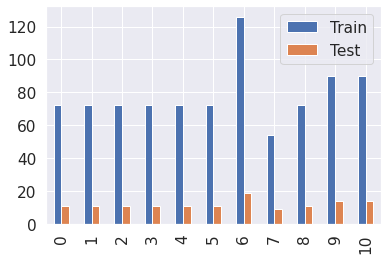

In [67]:
df=pd.concat([pd.DataFrame(np.unique(classes_train,return_counts=True)).drop(0).rename(index={1:'Train'}).T,
              pd.DataFrame(np.unique(classes_valid,return_counts=True)).drop(0).rename(index={1:'Test'}).T],axis=1)
              
df.plot(kind='bar');


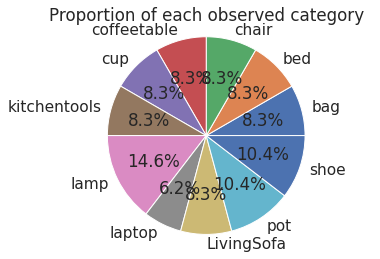

In [68]:
plt.pie(df['Train'],
        explode=(0, 0, 0, 0, 0, 0,0,0,0,0,0) , 
        labels=class_names,
        autopct='%1.1f%%')
plt.axis('equal')
plt.title('Proportion of each observed category')
plt.show()

In [69]:
def displayimagebyindex(index,dset='Train'):
    if dset=='Train':
        img=train_images[index]
        lbl=list(pd.Series(classes_train[index]).map(mapclass))[0]
    else:
        img=valid_images[index]
        lbl=list(pd.Series(classes_valid[index]).map(mapclass))[0]
    plt.figure()
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.title('{} Image #{} : {}'.format(dset,index,lbl))
    plt.show()

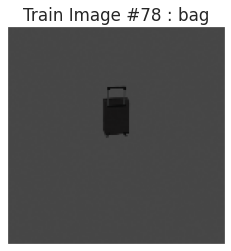

In [70]:

displayimagebyindex(np.random.randint(0,800),dset='Train')

In [71]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(11, activation=tf.nn.softmax)
])

In [72]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [73]:
history = model.fit(train_images, classes_train, batch_size=128, epochs=20, validation_split = 0.2)

Epoch 1/20
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
5/6 [========================>.....] - ETA: 0s - loss: 2.9253 - accuracy: 0.0984WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7fad320cf5f0> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the ve

In [74]:
print(len(valid_images))
print(len(classes_valid))

133
133


In [75]:
val_loss = model.evaluate(valid_images, classes_valid)

5/5 [==============================] - 0s 14ms/step - loss: 0.0572 - accuracy: 0.9850


In [76]:

predictions = model.predict(valid_images)
pred_labels = np.argmax(predictions, axis = 1)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [77]:

def checkpredictions(index):
    displayimagebyindex(index,dset='Test')
    print('Predicted Class : ')
    print("     ",list(pd.Series(pred_labels[index]).map(mapclass))[0])

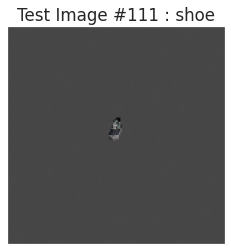

Predicted Class : 
      shoe


In [78]:
checkpredictions(np.random.randint(100,133))

In [79]:
print(classification_report(classes_valid, pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95        11
           1       0.92      1.00      0.96        11
           2       1.00      1.00      1.00        11
           3       1.00      0.91      0.95        11
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00        11
           6       1.00      1.00      1.00        19
           7       0.90      1.00      0.95         9
           8       1.00      1.00      1.00        11
           9       1.00      1.00      1.00        14
          10       1.00      1.00      1.00        14

    accuracy                           0.98       133
   macro avg       0.98      0.98      0.98       133
weighted avg       0.99      0.98      0.98       133



In [80]:
def display_examples(class_names, images, labels):
    """
        Display 25 images from the images array with its corresponding labels
    """
    
    fig = plt.figure(figsize=(10,10))
    fig.suptitle("Some examples of mislabeled images by the classifier", fontsize=16)
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[labels[i]])
    plt.show()

In [81]:
def print_mislabeled_images(class_names, test_images, test_labels, pred_labels):
    """
        Print 25 examples of mislabeled images by the classifier, e.g when test_labels != pred_labels
    """
    BOO = (test_labels == pred_labels)
    mislabeled_indices = np.where(BOO == 0)
    mislabeled_images = test_images[mislabeled_indices]
    mislabeled_labels = pred_labels[mislabeled_indices]

    title = "Some examples of mislabeled images by the classifier:"
    display_examples(class_names,  mislabeled_images, mislabeled_labels)

IndexError: ignored

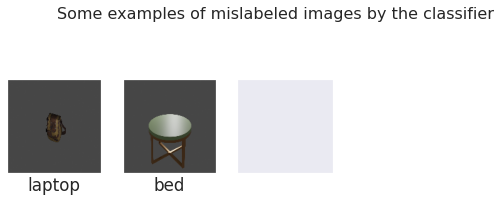

In [82]:
# print_mislabeled_images(class_names, valid_images, classes_valid, pred_labels)

In [ ]:

# CM = confusion_matrix(classes_valid, pred_labels)
# ax = plt.axes()
# sn.heatmap(CM, annot=True, 
#            annot_kws={"size": 10}, 
#            xticklabels=class_names, 
#            yticklabels=class_names, ax = ax)
# ax.set_title('Confusion matrix')
# plt.show()

In [ ]:
# from keras.applications.vgg16 import VGG16
# from keras.preprocessing import image
# from keras.applications.vgg16 import preprocess_input

# model = VGG16(weights='imagenet', include_top=False)

In [ ]:
# train_features = model.predict(train_images)
# valid_features = model.predict(valid_images)

In [ ]:
# n_train, x, y, z = train_features.shape
# n_test, x, y, z = valid_features.shape
# numFeatures = x * y * z

In [ ]:
# from sklearn import decomposition

# pca = decomposition.PCA(n_components = 2)

# X = train_features.reshape((n_train, x*y*z))
# pca.fit(X)

# C = pca.transform(X) # Représentation des individus dans les nouveaux axe
# C1 = C[:,0]
# C2 = C[:,1]

In [ ]:
# plt.subplots(figsize=(10,10))

# for i, class_name in enumerate(class_names):
#     plt.scatter(C1[classes_train == i][:1000], C2[classes_train == i][:1000], label = class_name, alpha=0.4)
# plt.legend()
# plt.title("PCA Projection")
# plt.show()

In [ ]:
# model2 = tf.keras.Sequential([
#     tf.keras.layers.Flatten(input_shape = (x, y, z)),
#     tf.keras.layers.Dense(50, activation=tf.nn.relu),
#     tf.keras.layers.Dense(11, activation=tf.nn.softmax)
# ])

# model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

# history2 = model2.fit(train_features, classes_train, batch_size=128, epochs=15, validation_split = 0.2)

In [ ]:
# valid_loss = model2.evaluate(valid_features, classes_valid)